with padding mask
[0.35080645161290325, 0.3689516129032258, 0.4737903225806452, 0.46774193548387094, 0.5362903225806451, 0.5745967741935484, 0.5584677419354839, 0.5705645161290323, 0.6048387096774194, 0.5887096774193549, 0.6028225806451613, 0.6270161290322581, 0.6491935483870968, 0.6612903225806451, 0.6754032258064516, 0.6512096774193549, 0.6733870967741935, 0.6592741935483871, 0.6935483870967742, 0.6612903225806451, 0.6411290322580645, 0.6653225806451613, 0.6733870967741935, 0.6754032258064516, 0.6592741935483871]
without padding mask for comparing
[0.3387096774193548, 0.375, 0.4495967741935484, 0.48588709677419356, 0.5221774193548387, 0.5504032258064516, 0.5705645161290323, 0.5786290322580645, 0.6008064516129032, 0.6270161290322581, 0.6048387096774194, 0.6229838709677419, 0.6149193548387096, 0.6411290322580645, 0.6411290322580645, 0.6411290322580645, 0.6411290322580645, 0.655241935483871, 0.6673387096774194, 0.6612903225806451, 0.6754032258064516, 0.6592741935483871, 0.67137096774193

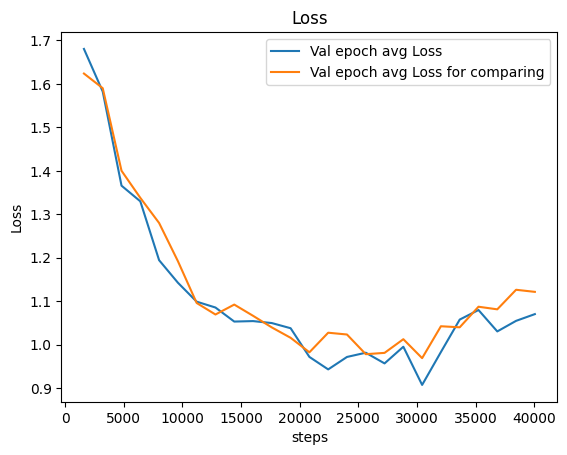

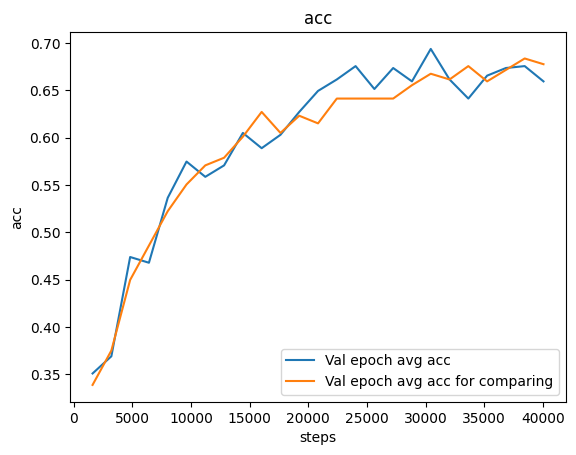

max of val avg acc: 0.6935483870967742
for compare max of val avg_acc: 0.6834677419354839


In [16]:
import matplotlib.pyplot as plt
import numpy as np

num_train = 1602
num_val = 63

f1 = open( './P_M_ape_rpb_train.log')
f2 = open( './P_M_ape_rpb_val.log')
f3 = open( './P_M_compare_ape_train.log')
f4 = open( './P_M_compare_ape_val.log')

x = []
loss = []
acc = []
x_c = []
loss_c = []
acc_c = []
v_x = []
v_loss = []
v_acc = []
v_x_c = []
v_loss_c = []
v_acc_c = []
v_avg_x = []
v_avg_loss = []
v_avg_acc = []
v_avg_x_c = []
v_avg_loss_c = []
v_avg_acc_c = []
v2_avg_x = []
v2_avg_loss = []
v2_avg_acc = []
v2_avg_x_c = []
v2_avg_loss_c = []
v2_avg_acc_c = []


for line1 in f1:
    line1_split = line1.split(",")
    x.append( float(line1_split[0].split(':')[1] ) )
    loss.append( float(line1_split[1].split(':')[1]) )
    acc.append( float(line1_split[2].split(':')[1]) )

for line1 in f3:
    line1_split = line1.split(",")
    x_c.append( float(line1_split[0].split(':')[1] ) )
    loss_c.append( float(line1_split[1].split(':')[1]) )
    acc_c.append( float(line1_split[2].split(':')[1]) )

for line2 in f2:
    line2_split = line2.split(",")
    v_x.append( float(line2_split[0].split(':')[1] ) / num_val * num_train )
    v_loss.append( float(line2_split[1].split(':')[1]) )
    v_acc.append( float(line2_split[2].split(':')[1] ) )    

for line2 in f4:
    line2_split = line2.split(",")
    v_x_c.append( float(line2_split[0].split(':')[1] ) / num_val * num_train )
    v_loss_c.append( float(line2_split[1].split(':')[1]) )
    v_acc_c.append( float(line2_split[2].split(':')[1] ) )    
    
    
for i in range( 0, len( v_x ), num_val ):
    v2_avg_x.append( (i + num_val ) / num_val * num_train )
    v2_avg_loss.append( np.mean( v_loss[i:i+ num_val - 1]))
    v2_avg_acc.append( np.mean( v_acc[i:i+ num_val - 1]))
    
for i in range( 0, len( v_x_c ), num_val ):
    v2_avg_x_c.append( (i + num_val ) / num_val * num_train )
    v2_avg_loss_c.append( np.mean( v_loss_c[i:i+ num_val - 1]))
    v2_avg_acc_c.append( np.mean( v_acc_c[i:i+ num_val - 1]))
    
    
moving_avg = num_val
i_max = len( v_loss )
for i in range( int( i_max ) ):
    i2 = i / num_val * num_train
    i4 = i + 1 
    if i4 >= i_max:
        break
    v_avg_x.append( i2 )
    if i4 < moving_avg:
        v_avg_loss.append( np.mean( float('nan') ) )
        v_avg_acc.append( np.mean( 0 ) )
    else:
        v_avg_loss.append( np.mean( v_loss[i4 - moving_avg:i4] ) )
        v_avg_acc.append( np.mean( v_acc[i4 - moving_avg:i4] ) )
        
i_max = len( v_loss_c )
for i in range( int( i_max ) ):
    i2 = i / num_val * num_train
    i4 = i + 1 
    if i4 >= i_max:
        break
    v_avg_x_c.append( i2 )
    if i4 < moving_avg:
        v_avg_loss_c.append( np.mean( float('nan') ) )
        v_avg_acc_c.append( np.mean( 0 ) )
    else:
        v_avg_loss_c.append( np.mean( v_loss_c[i4 - moving_avg:i4] ) )
        v_avg_acc_c.append( np.mean( v_acc_c[i4 - moving_avg:i4] ) )

print( "with padding mask")
print( v2_avg_acc )
print( "without padding mask for comparing")
print( v2_avg_acc_c)

#plt.plot( x, loss, label="Train loss")
#plt.plot( x_c, loss_c, label="Train loss for comparing")
#plt.plot( v_avg_x, v_avg_loss, label="Val moving avg Loss")
plt.plot( v2_avg_x, v2_avg_loss, label="Val epoch avg Loss")
#plt.plot( v_avg_x_c, v_avg_loss_c, label="Val compare moving avg Loss")
plt.plot( v2_avg_x_c, v2_avg_loss_c, label="Val epoch avg Loss for comparing")
plt.title( "Loss")
plt.xlabel( 'steps')
plt.ylabel( 'Loss')
plt.legend()
#plt.ylim( 0, 20 )
#plt.xlim( 116000, 130000 )
plt.show()

#plt.plot( x, acc, label = 'Train acc')
#plt.plot( x_c, acc_c, label = 'Train acc for comparing')
#plt.plot( v_avg_x, v_avg_acc, label="Val moving avg acc" )
plt.plot( v2_avg_x, v2_avg_acc, label="Val epoch avg acc" )
#plt.plot( v_avg_x_c, v_avg_acc_c, label="Val compare moving avg acc" )
plt.plot( v2_avg_x_c, v2_avg_acc_c, label="Val epoch avg acc for comparing" )
plt.title( "acc")
plt.xlabel( 'steps')
plt.ylabel( 'acc')
plt.legend()
#plt.ylim( 0.3, 1 )
#plt.xlim( 116000, 130000 )
plt.show()

print( "max of val avg acc:", max( v2_avg_acc))
print( "for compare max of val avg_acc:", max( v2_avg_acc_c))